# Analysis Example

To log data to the USB drive, put this in the Java code:

```
DataLogManager.start()
```

This logs all the NetworkTables traffic, e.g. LiveWindow or SmartDashboard.

This notebookshows how to load the file so you can analyze it.

It works while disconnected from the internet, so it will
work at a competition: pull the USB drive from the robot, stick
it in the laptop, and run this script (ideally a copy of it).

## Setup

Install the file-dialog thing if it's not already.  Import stuff.


In [1]:
%%capture # suppress the output
!pip install ipyfilechooser # fails if not online and not already installed
import log2df
import pandas as pd
import matplotlib.pyplot as plt
import re

## Load data

This file dialog isn't great, but it works.  Find the USB stick, pick the file you want.  You have
to run this part manually, it doesn't work if you say "run all".

If you want to save this analysis for other people to look at (which would be great) then
copy the log file somewhere near this ipynb file and check it in.

In [8]:
#!wget -q -O logfile https://github.com/Team100/logs/blob/main/FRC_20230129_232220.wpilog?raw=true
from ipyfilechooser import FileChooser
fc=FileChooser()
display(fc)

FileChooser(path='C:\Users\joelt\FRC\TRUHER\studies2023\log_analysis', filename='', title='', show_hidden=Fals…

In [9]:
print(fc.selected)

C:\Users\joelt\FRC\TRUHER\studies2023\log_analysis\FRC_20230205_004848.wpilog


# Columns

Loads the data into a dataframe, and shows the columns available.

The MsgPack format requires some annoying gymnastics to unpack here; I've left it as a step-by-step unpacking to make it clear, but you don't have to expose all these steps if you don't want to.

In [10]:

df = log2df.log2df(fc.selected)
print(df.columns)

tag_col = df['NT:/Vision/tags']
print(tag_col) # the msgpack column
normalized_tag_col = pd.json_normalize(tag_col)
print(normalized_tag_col) # dict key to column, it's just the "tags" key
exploded_normalized_tag_col =normalized_tag_col.explode('tags')
print(exploded_normalized_tag_col) # multiple targets -> multiple rows
obj_cols = pd.json_normalize(exploded_normalized_tag_col['tags'].tolist())
print(obj_cols) # tag fields -> columns
pose_t  = obj_cols['pose_t'].apply(pd.Series)
print(pose_t) # pose with weird extra dimension
df = pose_t.explode([0,1,2]) # remove the extra dimension
print(df)

Index(['NT:/LiveWindow/.status/LW Enabled', 'NT:/Vision/tags',
       'NT:/FMSInfo/.type', 'NT:/FMSInfo/GameSpecificMessage',
       'NT:/FMSInfo/EventName', 'NT:/FMSInfo/IsRedAlliance', 'NTConnection',
       'NT:/example_table/timestamp', 'systemTime'],
      dtype='object')
timestamp
782469                                                    NaN
1155862     {'tags': [{'id': 5, 'pose_t': [[-0.68585474101...
983246      {'tags': [{'id': 5, 'pose_t': [[-0.68585474101...
983467      {'tags': [{'id': 5, 'pose_t': [[-0.68585474101...
983655      {'tags': [{'id': 5, 'pose_t': [[-0.68585474101...
                                  ...                        
36933659    {'tags': [{'id': 5, 'pose_t': [[-0.67229938412...
36953554    {'tags': [{'id': 5, 'pose_t': [[-0.67229938412...
36973658    {'tags': [{'id': 5, 'pose_t': [[-0.67229938412...
36993635    {'tags': [{'id': 5, 'pose_t': [[-0.67229938412...
37013564    {'tags': [{'id': 5, 'pose_t': [[-0.67229938412...
Name: NT:/Vision/tags, Length:

## Position

Plots a couple of columns in the dataframe.

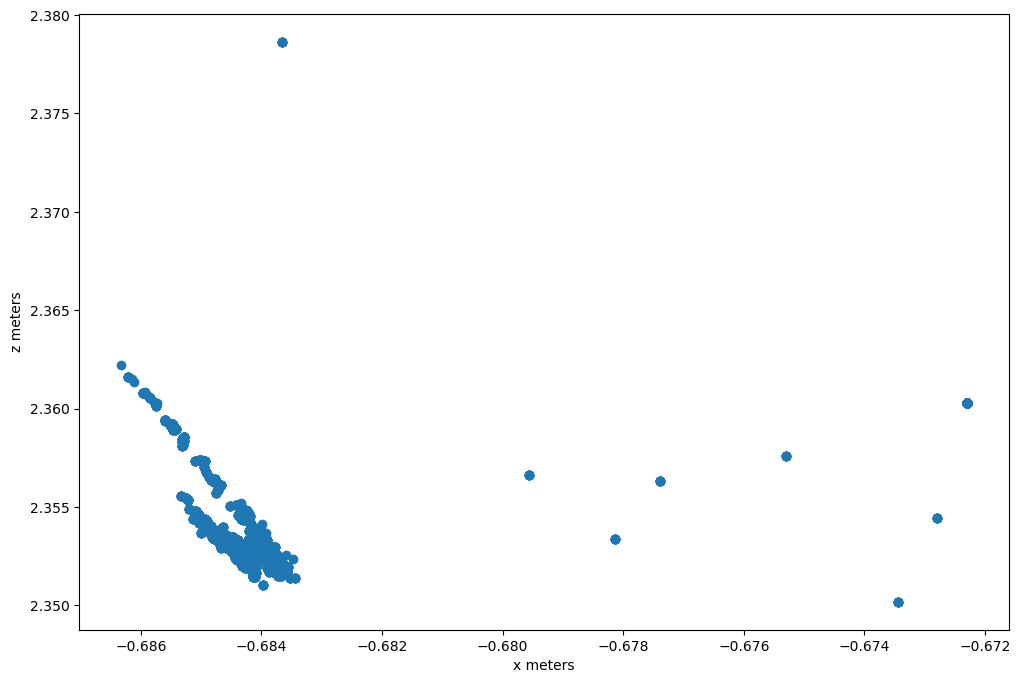

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(df[0], df[2])
plt.xlabel("x meters")
plt.ylabel("z meters")
plt.show()
